# ST 590-651 Project 2 Part 2: Northwind Data Analysis

*Performed by Group G: Raiden Han, Jingjing Li, Nataliya Peshekhodko*

*06/27/2022*

## Introduction and Module Preparation

This section will analyze the [Northwind sample database](https://github.com/jpwhite3/northwind-SQLite3) provided with Microsoft Access 2000 and from Github, using `SQLite3` and other Python modules.

![Northwind](images/Northwind_ERD.png)

To begin with, we will import the necessary modules and build a connection to the database.

In [1]:
import sqlite3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Build a connection to the database
con = sqlite3.connect(r"data/northwind.sqlite")

## Data Integration and Analysis

Before performing any data analysis, we want to check the schema of the database to ensure that the tables contained in our database are consistent with the entity-relationship diagram above and to determine the integrity of the data.

In [2]:
pd.read_sql_query(
    """
    SELECT *
    FROM sqlite_schema
    WHERE type = 'table';
    """,
    con,
)

,type,name,tbl_name,rootpage,sql
0,table,Categories,Categories,2,CREATE TABLE [Categories]\n( [CategoryID]...
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,CustomerCustomerDemo,CustomerCustomerDemo,28,CREATE TABLE [CustomerCustomerDemo](\n [Cust...
3,table,CustomerDemographics,CustomerDemographics,30,CREATE TABLE [CustomerDemographics](\n [Cust...
4,table,Customers,Customers,32,CREATE TABLE [Customers]\n( [CustomerID] ...
5,table,Employees,Employees,38,CREATE TABLE [Employees]\n( [EmployeeID] ...
6,table,EmployeeTerritories,EmployeeTerritories,68,CREATE TABLE [EmployeeTerritories](\n [Emplo...
7,table,Order Details,Order Details,70,CREATE TABLE [Order Details](\n [OrderID]INT...
8,table,Orders,Orders,92,CREATE TABLE [Orders](\n [OrderID]INTEGER NO...
9,table,Products,Products,128,CREATE TABLE [Products](\n [ProductID]INTEGE...


The schema of the database does contain 13 tables, which is consistent with above schematic diagram. Next, we will analyze the above tables in combination.

### Employees' Information

In [3]:
employee_info = pd.read_sql_query(
    """
    SELECT EmployeeID, FirstName, LastName, 
    Title, City, Country, ReportsTo 
    FROM Employees
    """,
    con,
)
employee_info

,EmployeeID,FirstName,LastName,Title,City,Country,ReportsTo
0,1,Nancy,Davolio,Sales Representative,Seattle,USA,2.0
1,2,Andrew,Fuller,"Vice President, Sales",Tacoma,USA,NaN
2,3,Janet,Leverling,Sales Representative,Kirkland,USA,2.0
3,4,Margaret,Peacock,Sales Representative,Redmond,USA,2.0
4,5,Steven,Buchanan,Sales Manager,London,UK,2.0
5,6,Michael,Suyama,Sales Representative,London,UK,5.0
6,7,Robert,King,Sales Representative,London,UK,5.0
7,8,Laura,Callahan,Inside Sales Coordinator,Seattle,USA,2.0
8,9,Anne,Dodsworth,Sales Representative,London,UK,5.0


The `Employees` table shows nine employees. To see employees' territories of responsibility information, next, we will join three tables of `Employees`, `EmployeeTerritories` and `Regions`.

In [4]:
employee_territory = pd.read_sql_query(
    """
    SELECT e.EmployeeID, e.FirstName, e.LastName,
    t.TerritoryDescription as Territory, r.RegionDescription as Region
    FROM Employees e
    INNER JOIN EmployeeTerritories et
    ON e.EmployeeID = et.EmployeeID
    INNER JOIN Territories t
    ON et.TerritoryID = t.TerritoryID
    INNER JOIN Regions r
    ON t.RegionID = r.RegionID
    """,
    con,
)
employee_territory["Territory"] = employee_territory["Territory"].str.strip()
employee_territory["Region"] = employee_territory["Region"].str.strip()
employee_territory

,EmployeeID,FirstName,LastName,Territory,Region
0,1,Nancy,Davolio,Wilton,Eastern
1,1,Nancy,Davolio,Neward,Eastern
2,2,Andrew,Fuller,Westboro,Eastern
3,2,Andrew,Fuller,Bedford,Eastern
4,2,Andrew,Fuller,Georgetow,Eastern
5,2,Andrew,Fuller,Boston,Eastern
6,2,Andrew,Fuller,Cambridge,Eastern
7,2,Andrew,Fuller,Braintree,Eastern
8,2,Andrew,Fuller,Louisville,Eastern
9,3,Janet,Leverling,Atlanta,Southern


It can be seen that different employees span various amounts of territories, most of which are taken by Robert King. In contrast, Nancy Davolio has the least territories.

### Employees & Orders

First, we will merge the employee form with the order form to get an overview of each employee's order information. In particular, we will keep the order date and freight and calculate the shipping time and the number of early arrival days.

In [5]:
employee_order = pd.read_sql_query(
    """
    SELECT e.EmployeeID, e.FirstName, e.LastName, 
    o.OrderID, o.orderDate, o.Freight, 
    JULIANDAY(o.ShippedDate) - JULIANDAY(o.OrderDate) AS ShippingDay, 
    JULIANDAY(o.RequiredDate) - JULIANDAY(o.ShippedDate) AS EarlyDay
    FROM Employees e
    INNER JOIN Orders o
    ON e.EmployeeID = o.EmployeeID;
    """,
    con,
)
employee_order.head()

,EmployeeID,FirstName,LastName,OrderID,OrderDate,Freight,ShippingDay,EarlyDay
0,5,Steven,Buchanan,10248,1996-07-04 00:00:00.000,32.38,12.0,16.0
1,6,Michael,Suyama,10249,1996-07-05 00:00:00.000,11.61,5.0,37.0
2,4,Margaret,Peacock,10250,1996-07-08 00:00:00.000,65.83,4.0,24.0
3,3,Janet,Leverling,10251,1996-07-08 00:00:00.000,41.34,7.0,21.0
4,4,Margaret,Peacock,10252,1996-07-09 00:00:00.000,51.30,2.0,26.0


We will aggregate the total number of orders for each employee in our database and sort them in descending order.

In [6]:
tope = pd.read_sql_query(
    """
    SELECT e.EmployeeID, e.FirstName, e.LastName, COUNT(*) AS OrderCount
    FROM Employees e
    INNER JOIN Orders o
    ON e.EmployeeID = o.EmployeeID
    GROUP BY e.EmployeeID
    ORDER BY OrderCount DESC;
    """,
    con,
)
tope

,EmployeeID,FirstName,LastName,OrderCount
0,4,Margaret,Peacock,156
1,3,Janet,Leverling,127
2,1,Nancy,Davolio,123
3,8,Laura,Callahan,104
4,2,Andrew,Fuller,96
5,7,Robert,King,72
6,6,Michael,Suyama,67
7,9,Anne,Dodsworth,43
8,5,Steven,Buchanan,42


The table above shows a large variation in the number of orders completed by individual employees in the company. Margaret Peacock has the highest number of orders at 156, while Steven Buchanan has the lowest number of orders at 42.

To better understand how the number of orders per employee changes over time, we will summarize the number of orders per employee on a six-month cycle and draw a line graph.

In [7]:
# Convert the OrderDate column to the TimeStamp data type
employee_order["OrderDate"] = pd.to_datetime(employee_order["OrderDate"])
# Count the half-year order numbers grouped by employees
order_count_time = (
    employee_order.groupby(["EmployeeID", "FirstName", "LastName"])
    .resample("2QS", on="OrderDate")
    .count()
    .iloc[:, 0]
    .rename("OrderCount")
    .reset_index()
)
order_count_time.head()

,EmployeeID,FirstName,LastName,OrderDate,OrderCount
0,1,Nancy,Davolio,1996-07-01,26
1,1,Nancy,Davolio,1997-01-01,20
2,1,Nancy,Davolio,1997-07-01,35
3,1,Nancy,Davolio,1998-01-01,42
4,2,Andrew,Fuller,1996-07-01,16


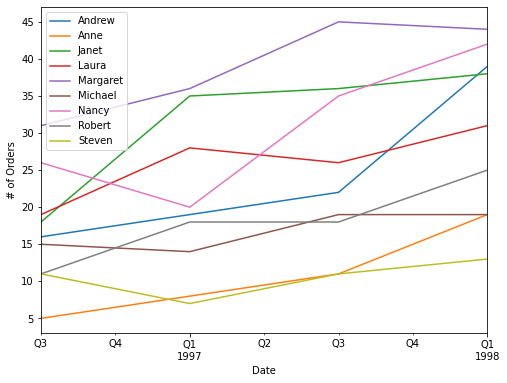

In [8]:
# Set the date as index
order_count_time.set_index("OrderDate", inplace=True)
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
order_count_time.groupby("FirstName")["OrderCount"].plot(ax=ax, legend=True)
ax.set_xlabel("Date")
ax.set_ylabel("# of Orders")
plt.show()

The line graph above reveals an important piece of information: the order data for all employees starts at approximately the same time. As time passes, the number of orders for each employee shows an upward trend, but the level does not change significantly. Also, the graph shows that Margaret has the most orders and Steven has the least orders, which is consistent with the previously described results.

Next, we will use tables and corresponding box plots to compare each employee's `Freight`, `ShippingDay`, and `EarlyDay`. 

In [9]:
employee_order.groupby("FirstName")["Freight"].describe()

,count,mean,std,min,25%,50%,75%,max
FirstName,,,,,,,,
Andrew,96.0,90.587604,142.054368,0.17,11.4225,45.560,92.7575,810.05
Anne,43.0,77.354884,128.135494,0.48,12.2550,30.850,93.3000,754.26
Janet,127.0,85.706614,146.117021,0.14,12.3700,43.900,90.4900,1007.64
Laura,104.0,71.998846,82.756930,0.33,12.5500,38.485,104.6925,398.36
Margaret,156.0,72.731667,103.157357,0.02,14.7000,42.965,81.8875,719.78
Michael,67.0,56.424925,74.193019,0.12,6.7000,27.330,71.0350,367.63
Nancy,123.0,71.842602,82.424136,0.21,21.6950,44.150,95.0300,544.08
Robert,72.0,92.575556,140.633406,0.40,16.4175,42.005,90.1700,830.75
Steven,42.0,93.302619,153.469722,0.59,15.7500,41.745,122.7825,890.78


In [10]:
employee_order.groupby("FirstName")["ShippingDay"].describe()

,count,mean,std,min,25%,50%,75%,max
FirstName,,,,,,,,
Andrew,93.0,8.053763,6.182664,1.0,4.00,7.0,10.00,32.0
Anne,42.0,10.857143,8.623766,1.0,6.25,7.0,10.75,34.0
Janet,127.0,8.425197,6.788786,1.0,5.00,7.0,9.00,35.0
Laura,100.0,8.680000,7.821080,1.0,4.00,6.0,9.25,37.0
Margaret,151.0,8.821192,6.978143,1.0,5.00,7.0,10.00,35.0
Michael,65.0,9.092308,7.242934,1.0,5.00,7.0,10.00,32.0
Nancy,120.0,7.758333,5.562473,1.0,4.00,6.5,9.00,34.0
Robert,69.0,8.376812,7.487443,1.0,4.00,7.0,9.00,37.0
Steven,42.0,7.023810,4.279777,1.0,4.25,6.5,9.00,25.0


In [11]:
employee_order.groupby("FirstName")["EarlyDay"].describe()

,count,mean,std,min,25%,50%,75%,max
FirstName,,,,,,,,
Andrew,93.0,19.344086,8.778054,-16.0,18.00,21.0,24.0,41.0
Anne,42.0,16.809524,11.828527,-17.0,8.75,21.0,23.0,37.0
Janet,127.0,19.133858,8.025121,-7.0,18.00,21.0,23.0,39.0
Laura,100.0,20.440000,9.995272,-9.0,18.00,22.0,25.0,39.0
Margaret,151.0,18.251656,8.662731,-18.0,16.50,21.0,23.5,34.0
Michael,65.0,19.338462,9.346251,-18.0,18.00,21.0,23.0,39.0
Nancy,120.0,19.775000,7.738871,-11.0,18.00,22.0,24.0,36.0
Robert,69.0,20.434783,9.540129,-23.0,19.00,22.0,25.0,36.0
Steven,42.0,20.976190,7.875520,-1.0,19.00,22.0,24.0,39.0


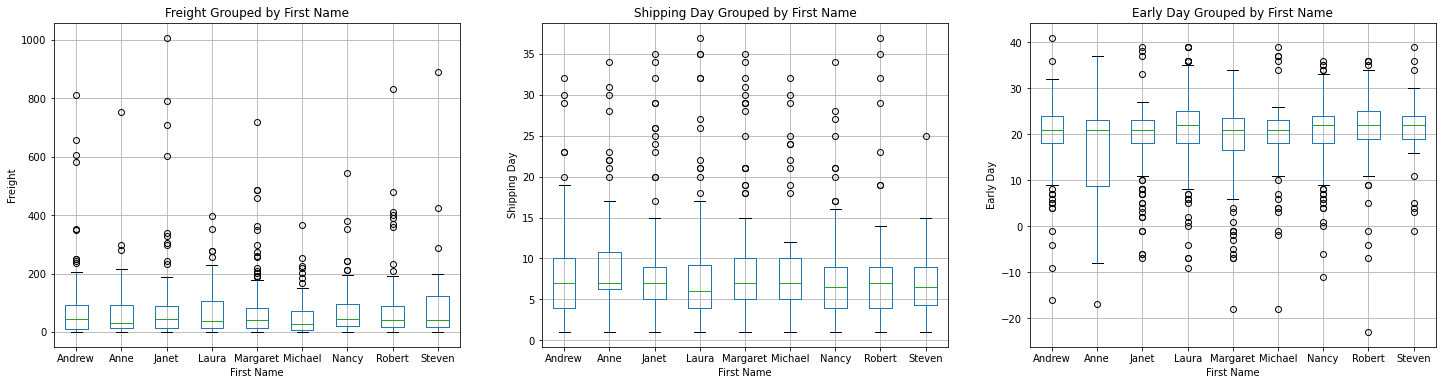

In [12]:
# Plotting
# Create the canvas
fig, ax = plt.subplots(ncols=3, figsize=(24, 6))
# Create boxplots
employee_order.boxplot(column="Freight", by="FirstName", ax=ax[0])
employee_order.boxplot(column="ShippingDay", by="FirstName", ax=ax[1])
employee_order.boxplot(column="EarlyDay", by="FirstName", ax=ax[2])
# Add labels
ax[0].set_title("Freight Grouped by First Name")
ax[0].set_xlabel("First Name")
ax[0].set_ylabel("Freight")
ax[1].set_title("Shipping Day Grouped by First Name")
ax[1].set_xlabel("First Name")
ax[1].set_ylabel("Shipping Day")
ax[2].set_title("Early Day Grouped by First Name")
ax[2].set_xlabel("First Name")
ax[2].set_ylabel("Early Day")
plt.suptitle("")
# Show the image
plt.show()

The above box plots show that each employee's median value of the freight, shipping day, and early day is similar. But they tend to skew up (freight and shipping day) or down (early day) with significant outlier points.

By and large, the median shipping time for each employee order is 7-8 days, with a median early arrival time of just over 20 days. However, there were delays in the arrival of each employee's order.

### Employees & Product Details

Next, we will investigate the product values of each employee's orders.

In [13]:
employee_category = pd.read_sql_query(
    """
    SELECT e.EmployeeID, e.FirstName, e.LastName, c.CategoryName, 
    s.CompanyName AS Supplier, od.OrderID, od.ProductID, 
    od.UnitPrice, od.Quantity, od.Discount
    FROM Employees e
    INNER JOIN Orders o
    ON e.EmployeeID = o.EmployeeID
    INNER JOIN "Order Details" od
    ON o.OrderID = od.OrderID
    INNER JOIN Products p 
    ON od.ProductID = p.ProductID
    INNER JOIN Categories c
    ON p.CategoryID = c.CategoryID
    INNER JOIN Suppliers s
    ON p.SupplierID = s.SupplierID;
    """,
    con,
)
employee_category.head()

,EmployeeID,FirstName,LastName,CategoryName,Supplier,OrderID,ProductID,UnitPrice,Quantity,Discount
0,5,Steven,Buchanan,Dairy Products,Cooperativa de Quesos 'Las Cabras',10248,11,14.0,12,0.0
1,5,Steven,Buchanan,Grains/Cereals,Leka Trading,10248,42,9.8,10,0.0
2,5,Steven,Buchanan,Dairy Products,Formaggi Fortini s.r.l.,10248,72,34.8,5,0.0
3,6,Michael,Suyama,Produce,Mayumi's,10249,14,18.6,9,0.0
4,6,Michael,Suyama,Produce,"G'day, Mate",10249,51,42.4,40,0.0


In [14]:
# Calculate product values
employee_category["Value"] = (
    employee_category["UnitPrice"]
    * employee_category["Quantity"]
    * (1 - employee_category["Discount"])
)
employee_category.head()

,EmployeeID,FirstName,LastName,CategoryName,Supplier,OrderID,ProductID,UnitPrice,Quantity,Discount,Value
0,5,Steven,Buchanan,Dairy Products,Cooperativa de Quesos 'Las Cabras',10248,11,14.0,12,0.0,168.0
1,5,Steven,Buchanan,Grains/Cereals,Leka Trading,10248,42,9.8,10,0.0,98.0
2,5,Steven,Buchanan,Dairy Products,Formaggi Fortini s.r.l.,10248,72,34.8,5,0.0,174.0
3,6,Michael,Suyama,Produce,Mayumi's,10249,14,18.6,9,0.0,167.4
4,6,Michael,Suyama,Produce,"G'day, Mate",10249,51,42.4,40,0.0,1696.0


In [15]:
# Summary values by first name and order ID
employee_order_value = (
    employee_category.groupby(["FirstName", "OrderID"])[
        ["Value"]].sum().reset_index()
)
employee_order_value.head()

,FirstName,OrderID,Value
0,Andrew,10265,1176.0
1,Andrew,10277,1200.8
2,Andrew,10280,613.2
3,Andrew,10295,121.6
4,Andrew,10300,608.0


In [16]:
# Summary values by first name
employee_total_value = (
    employee_order_value.groupby("FirstName")[["Value"]].sum().reset_index()
)
employee_total_value.head()

,FirstName,Value
0,Andrew,166537.7550
1,Anne,77308.0665
2,Janet,202812.8430
3,Laura,126862.2775
4,Margaret,232890.8460


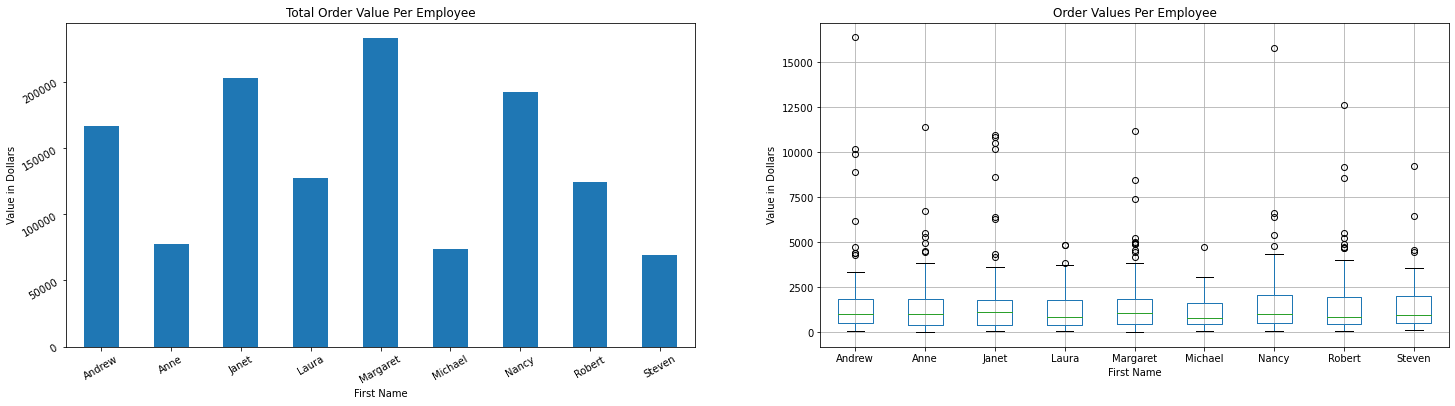

In [17]:
# Plotting
# Create the canvas
fig, ax = plt.subplots(ncols=2, figsize=(24, 6))
# Create boxplots
employee_total_value.plot(x="FirstName", y="Value",
                          kind="bar", ax=ax[0], legend=False)
employee_order_value.boxplot(column="Value", by="FirstName", ax=ax[1])
# Add labels
ax[0].set_title("Total Order Value Per Employee")
ax[0].set_xlabel("First Name")
ax[0].set_ylabel("Value in Dollars")
ax[0].tick_params(labelrotation=30)
ax[1].set_title("Order Values Per Employee")
ax[1].set_xlabel("First Name")
ax[1].set_ylabel("Value in Dollars")
plt.suptitle("")
# Show the image
plt.show()

As can be seen, Margaret has the highest total order value, and Steven has the lowest. The individual order values for each employee look similar, but there are some upper deviations and outliers. This is consistent with the order quantity results we obtained in the previous section.

Further, we can aggregate and classify order values based on product categories and explore the total value of each employee's orders under individual product categories.

In [18]:
# Summary values by first name and category
employee_cat_quantity_value = employee_category.groupby(
    ["FirstName", "CategoryName"]
).agg({"Quantity": sum, "Value": sum})
employee_cat_quantity_value.reset_index(inplace=True)
employee_cat_quantity_value.head()

,FirstName,CategoryName,Quantity,Value
0,Andrew,Beverages,1069,40248.250
1,Andrew,Condiments,709,14850.670
2,Andrew,Confections,863,21455.685
3,Andrew,Dairy Products,910,23812.550
4,Andrew,Grains/Cereals,645,11172.950


In [19]:
# Build a product quantity pivot table for subsequent plotting
employee_cat_quantity_pivot = pd.pivot_table(
    employee_cat_quantity_value,
    index="FirstName",
    columns="CategoryName",
    values="Quantity",
)
employee_cat_quantity_pivot.head()

CategoryName,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
FirstName,,,,,,,,
Andrew,1069,709,863,910,645,702,297,860
Anne,519,493,365,639,74,135,41,404
Janet,1310,670,1346,1308,887,525,327,1479
Laura,1308,634,989,726,688,419,411,738
Margaret,1572,1252,1535,1455,1000,921,558,1505


In [20]:
# Build a product value pivot table for subsequent plotting
employee_cat_value_pivot = pd.pivot_table(
    employee_cat_quantity_value,
    index="FirstName",
    columns="CategoryName",
    values="Value",
)
employee_cat_value_pivot.head()

CategoryName,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
FirstName,,,,,,,,
Andrew,40248.250,14850.6700,21455.6850,23812.550,11172.95,29873.600,9376.4800,15747.5700
Anne,19642.555,10125.5450,8053.1640,21101.125,1245.30,8676.660,314.8125,8148.9050
Janet,44757.405,13381.6375,33622.3955,32320.835,21235.01,20502.615,11960.8500,25032.0950
Laura,17897.850,14637.6600,21699.9125,21101.470,11072.05,16395.275,12016.5175,12041.5425
Margaret,50308.210,23314.8725,27768.7250,33549.800,22579.61,30867.136,17186.5625,27315.9300


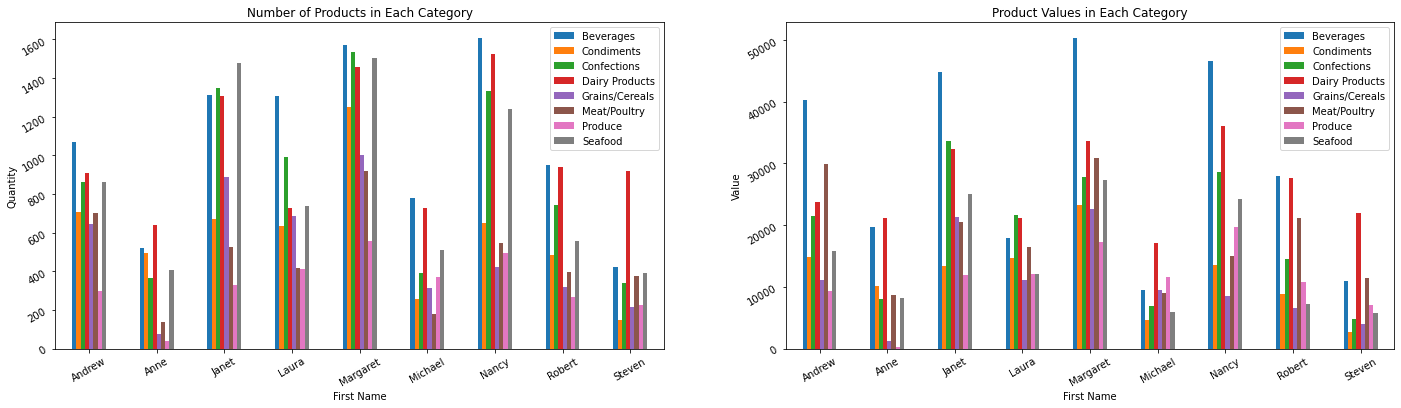

In [21]:
# Plotting
# Create the canvas
fig, ax = plt.subplots(ncols=2, figsize=(24, 6))
# Create barplots
employee_cat_quantity_pivot.plot(kind="bar", ax=ax[0])
employee_cat_value_pivot.plot(kind="bar", ax=ax[1])
# Add labels
ax[0].set_title("Number of Products in Each Category")
ax[0].set_xlabel("First Name")
ax[0].set_ylabel("Quantity")
ax[0].tick_params(labelrotation=30)
ax[0].get_legend().set_title("")
ax[1].set_title("Product Values in Each Category")
ax[1].set_xlabel("First Name")
ax[1].set_ylabel("Value")
ax[1].tick_params(labelrotation=30)
ax[1].get_legend().set_title("")
# Show the image
plt.show()

Comparatively, beverages, confectionery, dairy products, and seafood have more products than other categories, and beverages are significantly higher in value than other categories.

In a side-by-side comparison, Andrew, Janet, Margaret, and Nancy handled significantly more beverage products in total value than the others, while Laura handled a larger number of beverage products, but their total value was not as high. Janet, Margaret, and Nancy continue to lead in the total value of confectionery, dairy products, and seafood, with Andrew and Laura following closely behind.

Similarly, we can sort by supplier and aggregate the number of products under different suppliers for each employee.

In [22]:
# Build a product quantity pivot table by first name and supplier
employee_sup_quantity_pivot = pd.pivot_table(
    employee_category,
    index="Supplier",
    columns="FirstName",
    values="Quantity",
    aggfunc=sum,
)
employee_sup_quantity_pivot.head()

FirstName,Andrew,Anne,Janet,Laura,Margaret,Michael,Nancy,Robert,Steven
Supplier,,,,,,,,,
Aux joyeux ecclÃ©siastiques,179.0,67.0,212.0,85.0,250.0,151.0,222.0,102.0,148.0
Bigfoot Breweries,266.0,80.0,122.0,281.0,198.0,70.0,154.0,389.0,13.0
Cooperativa de Quesos 'Las Cabras',160.0,75.0,106.0,170.0,102.0,60.0,153.0,172.0,52.0
Escargots Nouveaux,30.0,NaN,145.0,60.0,143.0,NaN,65.0,49.0,42.0
Exotic Liquids,160.0,139.0,296.0,160.0,567.0,226.0,379.0,175.0,111.0


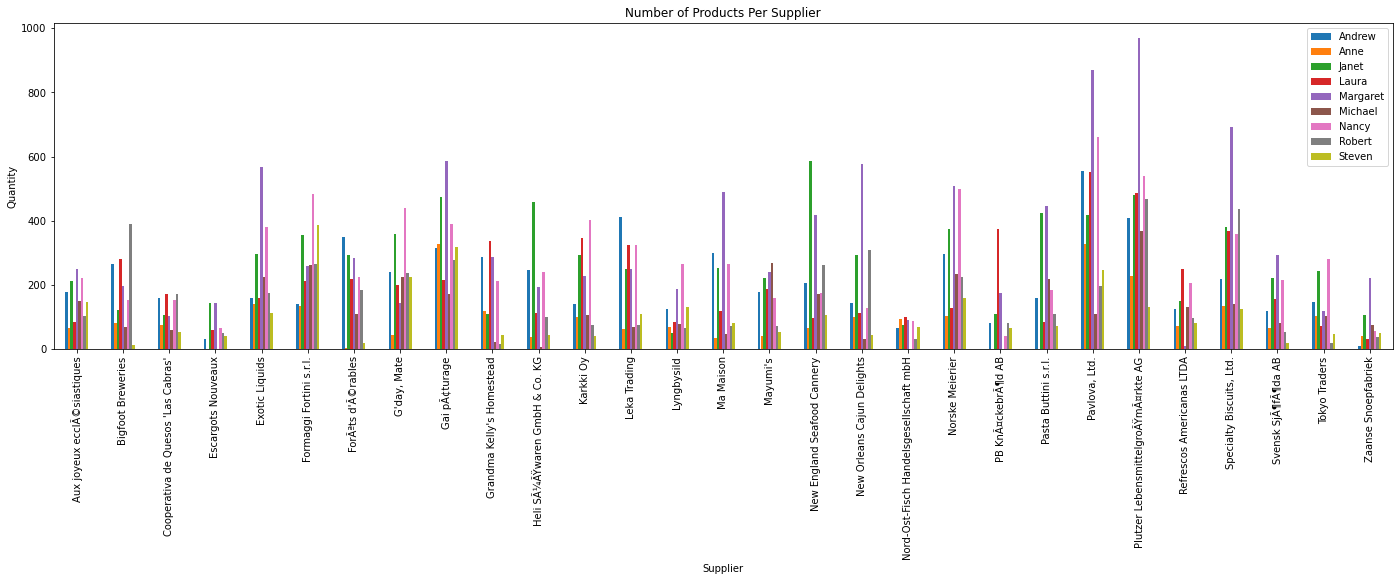

In [23]:
# Plotting
fig, ax = plt.subplots(figsize=(24, 6))
employee_sup_quantity_pivot.plot(kind="bar", ax=ax)
ax.set_title("Number of Products Per Supplier")
ax.set_xlabel("Supplier")
ax.set_ylabel("Quantity")
ax.get_legend().set_title("")
plt.show()

The chart above shows that the employees have roughly the same choice of suppliers, but there are differences in the quantities ordered. For example, also under the beverage category, Robert collects significantly more products from Bigfoot Breweries than from any other beverage supplier.

### Employees & Customers

Next, we will analyze the distribution of the countries where each employee is responsible for customers and the total value of orders in different regions.

In [24]:
# Combine the order information and the customer information
employee_customer_order = pd.read_sql_query(
    """
    SELECT e.EmployeeID, e.FirstName, e.LastName,
    o.OrderID, c.CustomerID, c.Country
    FROM Employees e
    INNER JOIN Orders o
    ON e.EmployeeID = o.EmployeeID
    INNER JOIN Customers c
    ON o.CustomerID = c.CustomerID;
    """,
    con,
)
# Combine the order values calculated above
employee_customer_order = pd.merge(
    employee_customer_order, employee_order_value, on=["FirstName", "OrderID"]
)
employee_customer_order.head()

,EmployeeID,FirstName,LastName,OrderID,CustomerID,Country,Value
0,5,Steven,Buchanan,10248,VINET,France,440.00
1,6,Michael,Suyama,10249,TOMSP,Germany,1863.40
2,4,Margaret,Peacock,10250,HANAR,Brazil,1552.60
3,3,Janet,Leverling,10251,VICTE,France,654.06
4,4,Margaret,Peacock,10252,SUPRD,Belgium,3597.90


In [25]:
# Calculate the number of customers per employee
employee_customer = employee_customer_order[
    ["FirstName", "CustomerID"]
].drop_duplicates()
employee_customer = (
    employee_customer.groupby("FirstName")
    .count()
    .reset_index()
    .rename(columns={"CustomerID": "CustomerCount"})
).sort_values('CustomerCount')
employee_customer

,FirstName,CustomerCount
1,Anne,29
8,Steven,29
5,Michael,43
7,Robert,45
3,Laura,56
0,Andrew,59
2,Janet,63
6,Nancy,65
4,Margaret,75


As you can see from the table above, Margaret had the highest number of customers with 75, while Anne and Steve each had only 29 customers.

In [26]:
# Count the number of customers per employee in each country
employee_country_order_count = pd.crosstab(
    index=employee_customer_order["FirstName"],
    columns=employee_customer_order["Country"],
)
employee_country_order_count

Country,Argentina,Austria,Belgium,Brazil,Canada,Denmark,Finland,France,Germany,Ireland,...,Mexico,Norway,Poland,Portugal,Spain,Sweden,Switzerland,UK,USA,Venezuela
FirstName,,,,,,,,,,,,,,,,,,,,,
Andrew,1,6,2,9,5,3,6,11,14,3,...,4,1,0,0,2,4,0,5,9,4
Anne,2,3,2,3,1,0,1,3,9,3,...,0,0,0,1,1,2,2,4,3,1
Janet,1,5,1,10,9,1,2,13,19,5,...,6,1,0,2,3,8,3,8,21,8
Laura,3,5,0,9,2,2,4,8,17,1,...,2,0,1,2,2,8,1,6,19,9
Margaret,4,6,6,20,3,3,3,14,25,1,...,4,0,2,3,7,3,4,12,22,8
Michael,1,4,1,8,3,1,1,9,9,3,...,0,0,1,0,0,2,2,5,14,2
Nancy,1,5,1,11,5,4,2,9,19,1,...,6,2,2,2,3,5,2,9,21,8
Robert,3,6,2,8,2,4,1,5,6,2,...,5,2,0,1,3,2,3,5,7,3
Steven,0,0,4,5,0,0,2,5,4,0,...,1,0,1,2,2,3,1,2,6,3


In [27]:
# Summarize the order values per employee in each country
employee_country_order_value = pd.crosstab(
    index=employee_customer_order["FirstName"],
    columns=employee_customer_order["Country"],
    values=employee_customer_order["Value"],
    aggfunc=sum,
).fillna(0)
employee_country_order_value

Country,Argentina,Austria,Belgium,Brazil,Canada,Denmark,Finland,France,Germany,Ireland,...,Mexico,Norway,Poland,Portugal,Spain,Sweden,Switzerland,UK,USA,Venezuela
FirstName,,,,,,,,,,,,,,,,,,,,,
Andrew,477.0,16603.0800,2866.500,9985.0300,9034.500,2345.7000,5878.0300,9434.2800,53627.1750,10604.980,...,2190.6500,622.35,0.00,0.0000,977.50,8036.7000,0.000,3411.400,22054.3500,2966.480
Anne,944.5,8967.8000,2808.375,1910.0000,966.800,0.0000,1590.5625,3828.7300,15753.5290,7403.900,...,0.0000,0.00,0.00,57.8000,224.00,4879.7500,2949.255,6836.550,17224.7150,378.000
Janet,319.2,23941.3500,295.380,9192.5900,12156.730,1684.2750,957.8600,15471.1300,45978.8275,16615.045,...,3076.9000,2684.40,0.00,987.5000,3375.25,11520.4050,5049.084,4608.100,33564.4525,11246.364
Laura,2750.5,10970.5875,0.000,11118.5800,1278.400,1814.3500,4131.8000,5356.0000,26497.9750,1313.820,...,988.8000,0.00,686.00,2893.4050,206.00,9303.5125,498.100,9319.800,25755.4825,9900.300
Margaret,1329.4,17959.6585,13597.200,17770.5650,4826.050,17291.8125,2117.7000,24340.8000,38341.3350,1366.400,...,6706.1000,0.00,1019.10,4454.5800,7729.89,1826.3000,5282.060,8751.110,46384.8350,8109.950
Michael,76.0,6728.9300,1209.000,6581.4675,3412.825,736.0000,270.0000,4470.3800,9816.9270,7558.000,...,0.0000,0.00,808.00,0.0000,0.00,3240.6250,3431.800,4527.500,17816.9550,3173.520
Nancy,686.7,17087.2800,732.600,29459.3690,8801.425,6674.0000,1828.9000,12487.4400,24611.3825,2519.000,...,5147.4650,1728.40,858.85,1519.2375,1241.00,7491.1800,4135.500,10945.735,43761.3205,9252.380
Robert,1535.8,25745.1525,4641.500,6200.2000,9719.560,2114.8850,642.0000,2985.9000,7608.9325,2598.760,...,4223.0625,700.00,0.00,285.1200,1861.10,6395.4375,9790.240,5469.435,23850.4500,7175.700
Steven,0.0,0.0000,7674.300,14707.9750,0.000,0.0000,1393.2000,2983.6625,8048.5500,0.000,...,1249.1000,0.00,160.00,1274.7200,2368.46,1801.2300,556.620,5101.680,15172.0500,4607.935


As you can see from the table above, there are significant differences in the operations of individual employees in different countries. For further understanding, we will select the top seven countries in terms of number and value of orders per employee and plot them below.

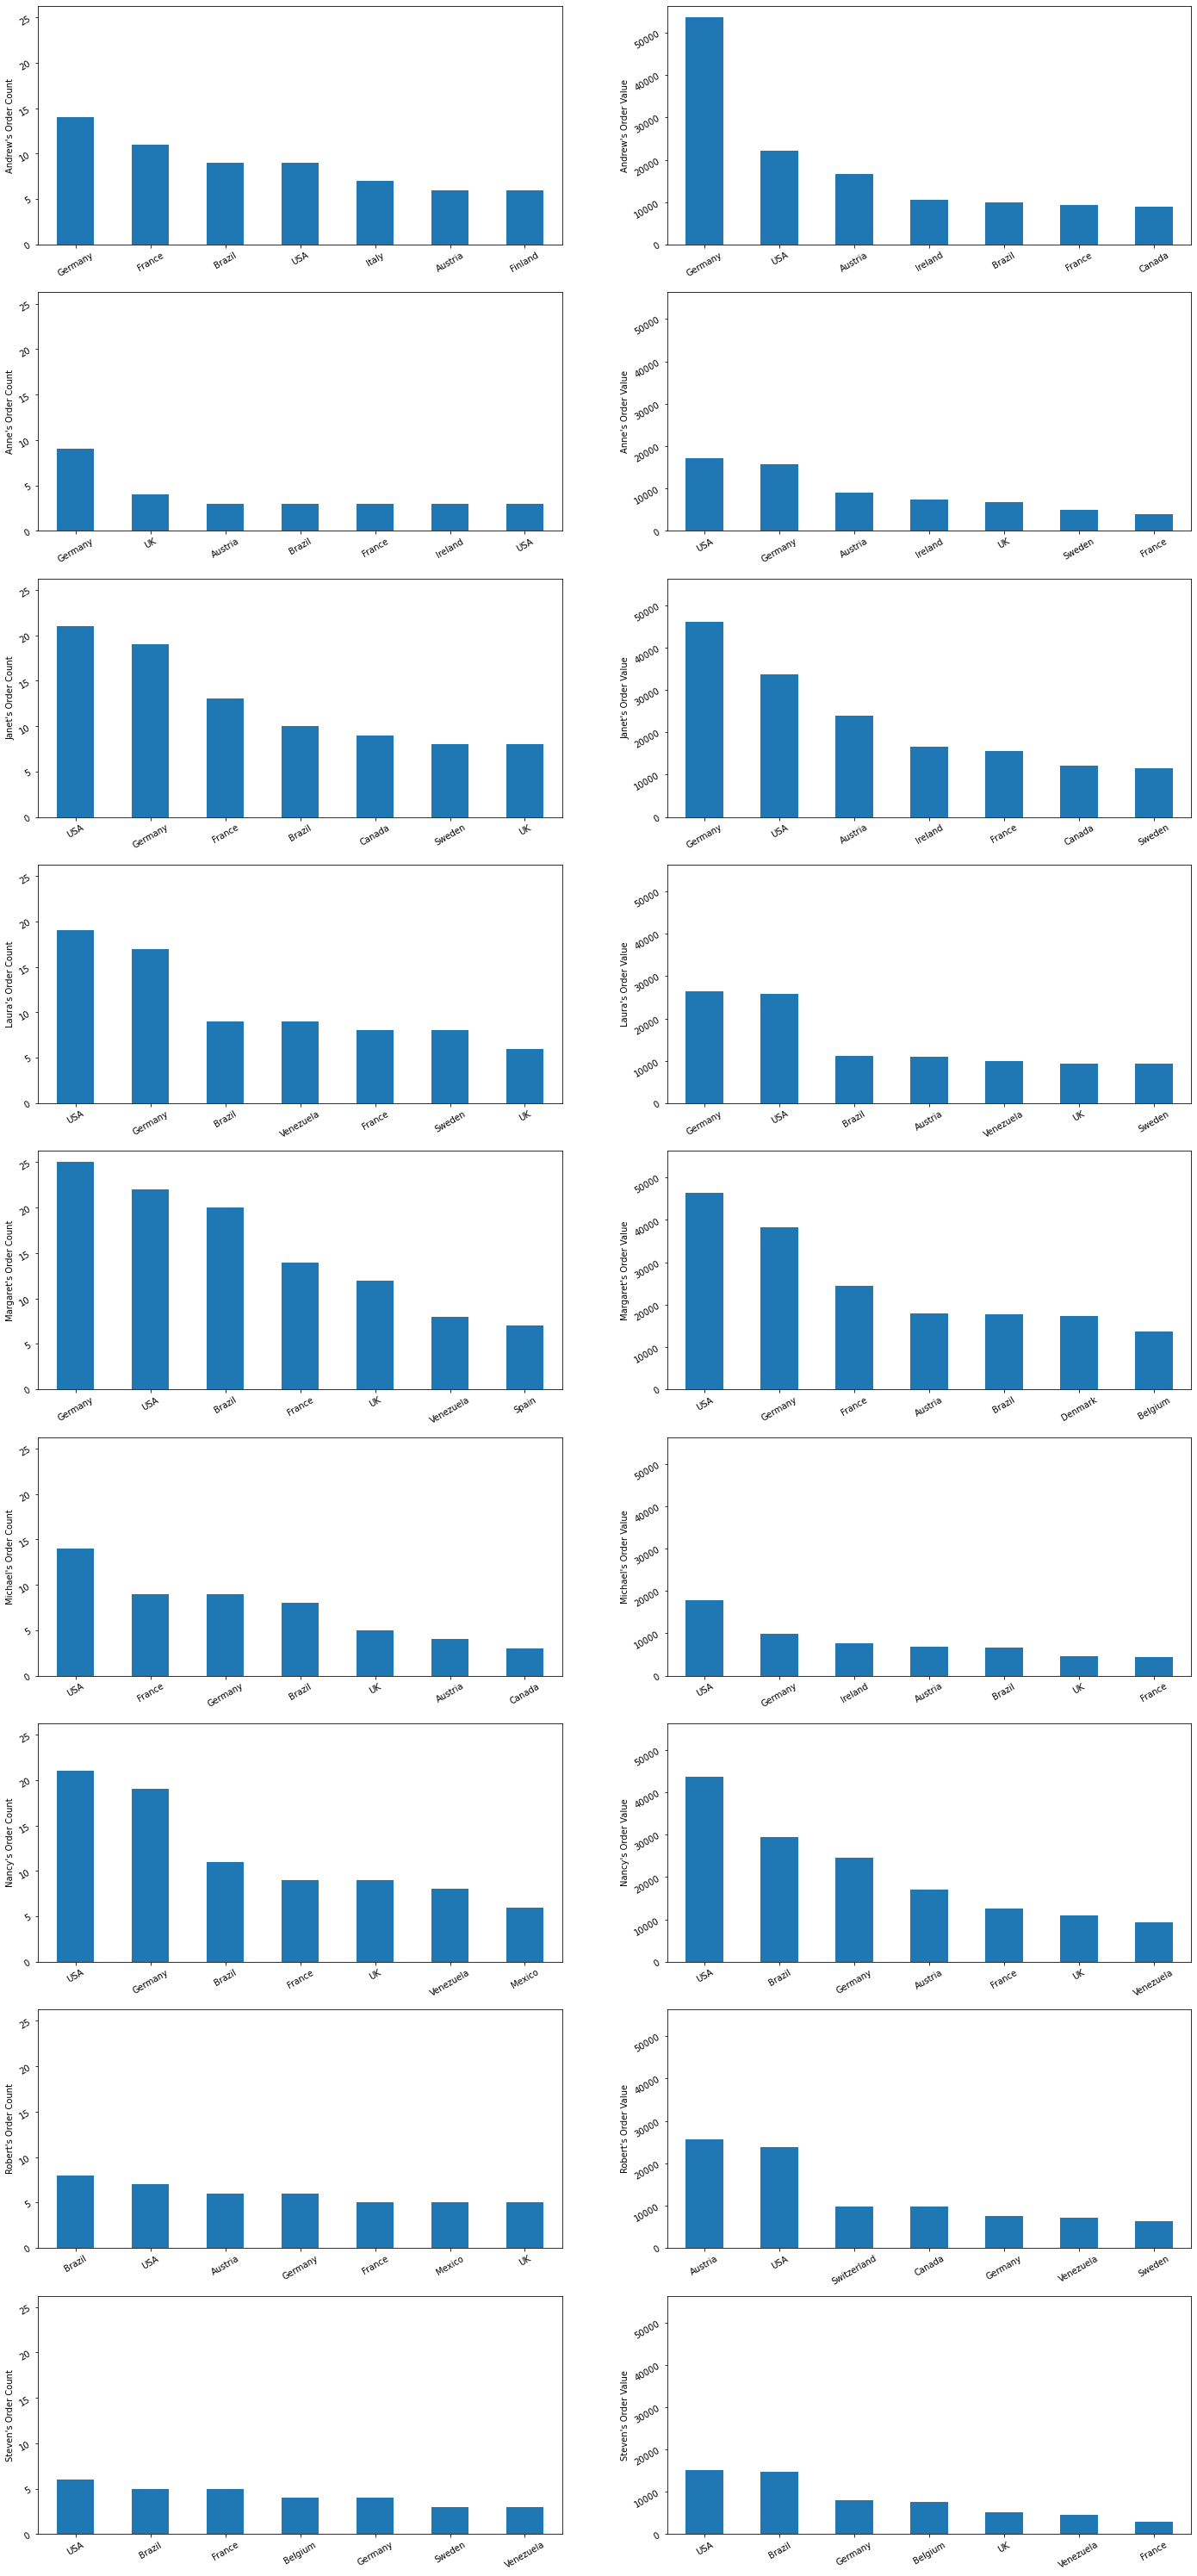

In [28]:
# Set the range of y-axis
count_range = (0, np.nanmax(employee_country_order_count) * 1.05)
value_range = (0, np.nanmax(employee_country_order_value) * 1.05)
# Plotting
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(24, 54))
n_large = 7
for i in range(employee_customer.shape[0]):
    # Retrieve each employee's order counts and values
    name = employee_customer.loc[i, 'FirstName']
    order_count = employee_country_order_count.iloc[i, :]
    order_value = employee_country_order_value.iloc[i, :]
    # Select the top 7 and plot
    order_count.nlargest(n_large).plot(
        kind="bar", ax=ax[i, 0], ylim=count_range)
    order_value.nlargest(n_large).plot(
        kind="bar", ax=ax[i, 1], ylim=value_range)
    # Add labels
    ax[i, 0].set_title("")
    ax[i, 1].set_title("")
    ax[i, 0].set_xlabel("")
    ax[i, 1].set_xlabel("")
    ax[i, 0].set_ylabel(f"{name}'s Order Count")
    ax[i, 1].set_ylabel(f"{name}'s Order Value")
    ax[i, 0].tick_params(labelrotation=30)
    ax[i, 1].tick_params(labelrotation=30)
plt.show()

As you can see from the chart above, the company's main areas of operation are the United States and Germany. However, the scope of business of individual employees also varies greatly. For example, Andrew and Nancy have a relatively high number of orders from Brazil, while Laura, Margarita, and Nancy almost cover the majority of orders from Venezuela.

Finally, we will show which country each employee has the least orders in and thus make suggestions for their future development.

In [29]:
employee_least_country_dict = {}
for name, row in employee_country_order_count.iterrows():
    name_country = row.nsmallest(n_large)
    employee_least_country_dict[name] = (
        name_country.index + ", " + name_country.values.astype(str)
    )
employee_least_country = pd.DataFrame(employee_least_country_dict)
employee_least_country

,Andrew,Anne,Janet,Laura,Margaret,Michael,Nancy,Robert,Steven
0,"Poland, 0","Denmark, 0","Poland, 0","Belgium, 0","Norway, 0","Mexico, 0","Argentina, 1","Poland, 0","Argentina, 0"
1,"Portugal, 0","Mexico, 0","Argentina, 1","Norway, 0","Ireland, 1","Norway, 0","Belgium, 1","Finland, 1","Austria, 0"
2,"Switzerland, 0","Norway, 0","Belgium, 1","Ireland, 1","Poland, 2","Portugal, 0","Ireland, 1","Portugal, 1","Canada, 0"
3,"Argentina, 1","Poland, 0","Denmark, 1","Poland, 1","Canada, 3","Spain, 0","Finland, 2","Belgium, 2","Denmark, 0"
4,"Norway, 1","Canada, 1","Italy, 1","Switzerland, 1","Denmark, 3","Argentina, 1","Norway, 2","Canada, 2","Ireland, 0"
5,"Belgium, 2","Finland, 1","Norway, 1","Canada, 2","Finland, 3","Belgium, 1","Poland, 2","Ireland, 2","Norway, 0"
6,"Spain, 2","Portugal, 1","Finland, 2","Denmark, 2","Portugal, 3","Denmark, 1","Portugal, 2","Italy, 2","Italy, 1"


The data in the table above can be combined with the above and lead to some enlightening recommendations. For example, neither Anne nor Michael has any customers in Mexico, which is not a small market, and this could be one of the future strengths for both of them. A more detailed suggestion will be given in the final summary section.

### Employees & Shipping

In the last part before the summary, we will present a comprehensive analysis of the employees and the transportation of their orders.

In [30]:
# Find the shipper for each order and the country to which it was shipped
employee_ship = pd.read_sql_query(
    """
    SELECT e.EmployeeID, e.FirstName, e.LastName,
    o.OrderID, s.CompanyName AS Shipper, o.ShipCountry
    FROM Employees e 
    INNER JOIN Orders o
    ON e.EmployeeID = o.EmployeeID
    INNER JOIN Shippers s
    ON o.ShipVia = s.ShipperID
    """,
    con,
)
# Combine the order values calculated above
employee_ship = pd.merge(
    employee_ship, employee_order_value, on=["FirstName", "OrderID"]
)
employee_ship.head()

,EmployeeID,FirstName,LastName,OrderID,Shipper,ShipCountry,Value
0,5,Steven,Buchanan,10248,Federal Shipping,France,440.00
1,6,Michael,Suyama,10249,Speedy Express,Germany,1863.40
2,4,Margaret,Peacock,10250,United Package,Brazil,1552.60
3,3,Janet,Leverling,10251,Speedy Express,France,654.06
4,4,Margaret,Peacock,10252,United Package,Belgium,3597.90


First, we can count the number and value of orders grouped by shippers.

In [31]:
# Count the number of orders per employee with each shipper
employee_shipper_count_pivot = pd.pivot_table(
    employee_ship, index="FirstName", columns="Shipper", values="Value", aggfunc="count"
)
employee_shipper_count_pivot.head()

Shipper,Federal Shipping,Speedy Express,United Package
FirstName,,,
Andrew,25,35,36
Anne,14,10,19
Janet,46,36,45
Laura,29,27,48
Margaret,40,46,70


In [32]:
# Sum the order values per employee with each shipper
employee_shipper_value_pivot = pd.pivot_table(
    employee_ship, index="FirstName", columns="Shipper", values="Value", aggfunc=sum
)
employee_shipper_value_pivot.head()

Shipper,Federal Shipping,Speedy Express,United Package
FirstName,,,
Andrew,41277.9900,63299.8650,61959.9000
Anne,22718.2000,17694.5575,36895.3090
Janet,64357.3290,50455.8690,87999.6450
Laura,35529.2175,33962.9950,57370.0650
Margaret,67736.4250,58511.8885,106642.5325


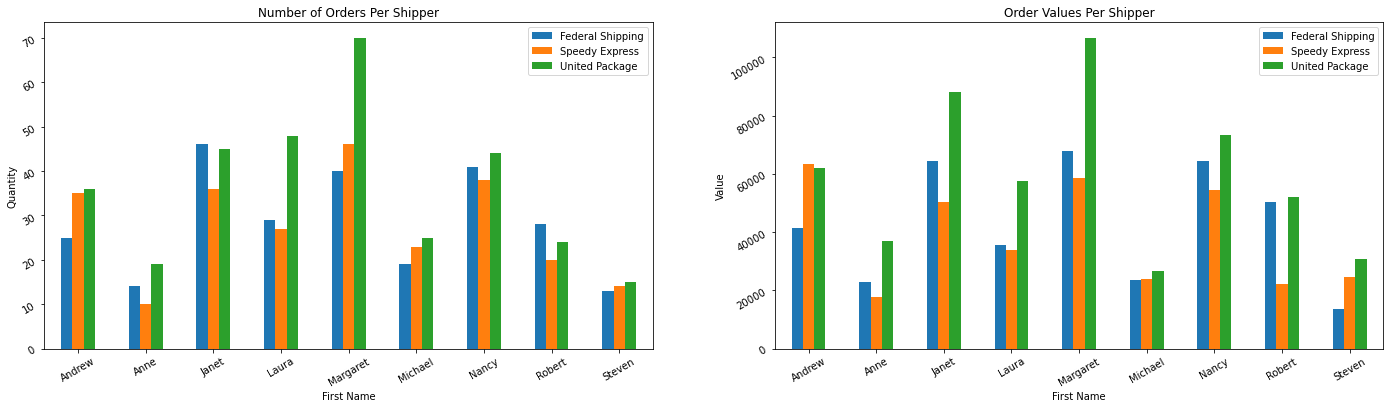

In [33]:
# Plotting
# Create the canvas
fig, ax = plt.subplots(ncols=2, figsize=(24, 6))
# Create barplots
employee_shipper_count_pivot.plot(kind="bar", ax=ax[0])
employee_shipper_value_pivot.plot(kind="bar", ax=ax[1])
# Add labels
ax[0].set_title("Number of Orders Per Shipper")
ax[0].set_xlabel("First Name")
ax[0].set_ylabel("Quantity")
ax[0].tick_params(labelrotation=30)
ax[0].get_legend().set_title("")
ax[1].set_title("Order Values Per Shipper")
ax[1].set_xlabel("First Name")
ax[1].set_ylabel("Value")
ax[1].tick_params(labelrotation=30)
ax[1].get_legend().set_title("")
# Show the image
plt.show()

As you can see from the chart above, United Package carries the majority of the company's orders. There is little difference in the number of orders between Speedy Express and Federal Shipping and no significant difference in preference between the two shippers by individual employees.

Finally, we will overview the distribution of order shipping of each employee in different countries. To clarify the presentation, we will show only the seven countries to which each employee shipped the most, aggregating the other countries in the calculation.

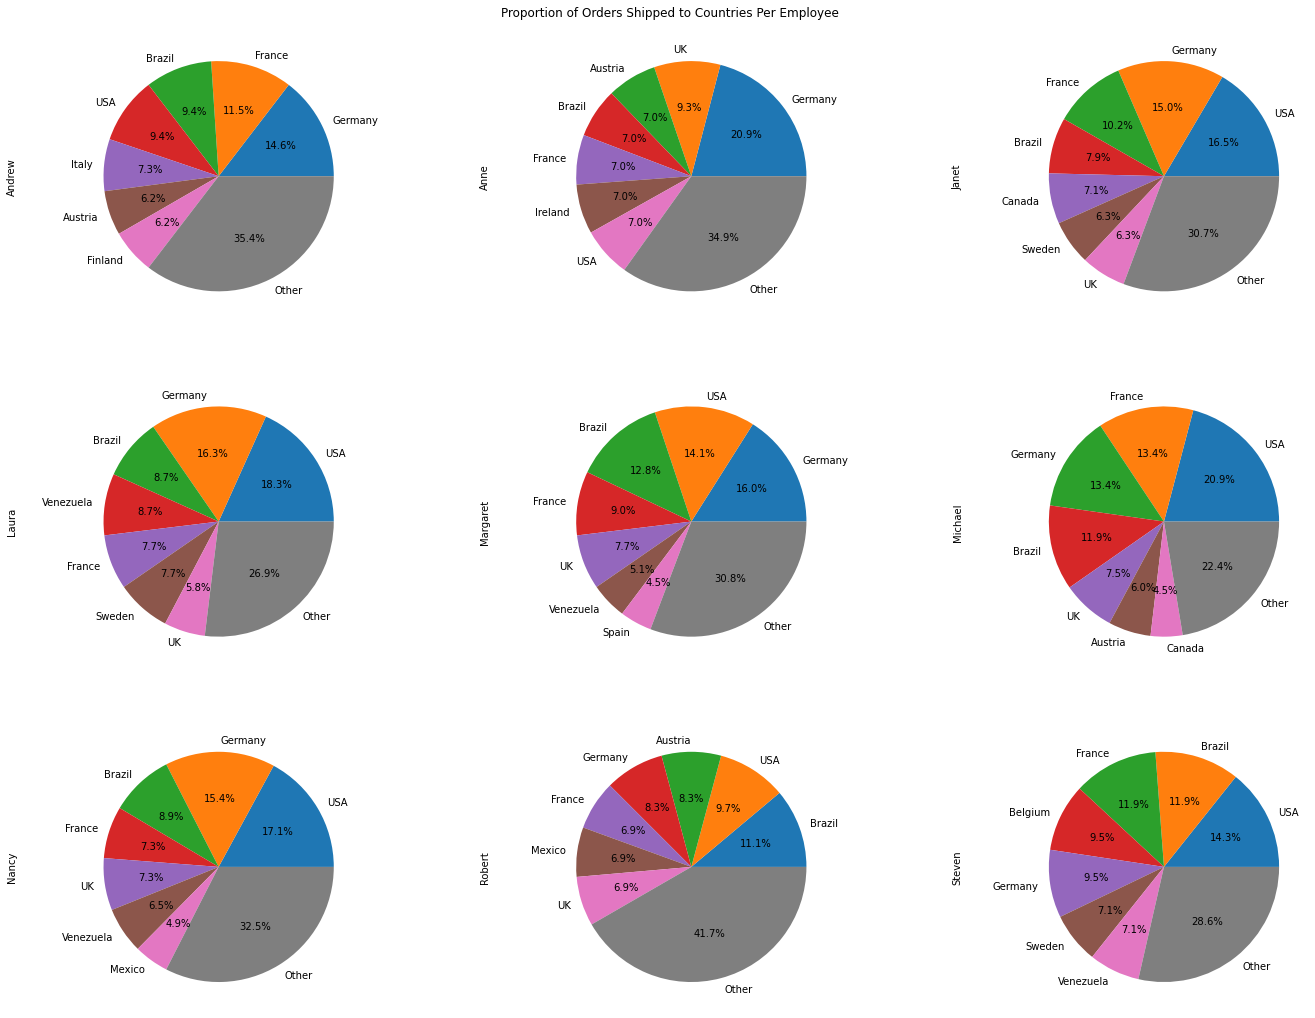

In [34]:
# Count order quantity by first name and country of shipment
employee_shipcountry = pd.crosstab(
    employee_ship["FirstName"], employee_ship["ShipCountry"]
)
# Create the canvas
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(24, 18))
i = j = 0
for name, row in employee_shipcountry.iterrows():
    # Select the seven countries to which shipped the most
    name_country = row.nlargest(n_large)
    # Sum the order numbers for other countries
    name_country.loc['Other'] = row.drop(name_country.index).sum()
    # Plotting
    name_country.plot(kind='pie', ax=ax[i, j], autopct='%1.1f%%')
    ax[i, j].yaxis.set_label_coords(-0.2, 0.5)
    # Use count variables to control image position
    j += 1
    if j == 3:
        i += 1
        j = 0
# Add a title
plt.suptitle('Proportion of Orders Shipped to Countries Per Employee', y=0.9)
plt.show()

As seen from the pie charts above, most of all employees' shipping countries are concentrated in the United States or Germany, in line with our previous conclusions regarding the country distribution of customers.

## Summary

Overall, we summarize the strengths of the company's nine employees and the areas in which they can be improved as follows (in alphabetical order by last name).
- Steven Buchanan *(Sales Manager)*
    - Strength
        - More consistent and faster shipping time, with the shortest average shipping time
        - Managers of UK employees
    - What can be improved
        - Fluctuating and small order quantities
        - Fewer sales of condiment-based products
        - Insufficient number of customers in Germany
- Laura Callahan *(Inside Sales Coordinator)*
    - Strength
        - High total number of orders and beverage orders
        - Relatively fast shipping speed
        - High number of Venezuelan customers
    - What can be improved
        - The unit price of orders, especially beverage orders, is low
- Nancy Devolio *(Sales Representative)*
    - Strength
        - More orders and faster growth, the total number of orders for the whole company is the third, the last quarter of the number of orders for the entire company is the second
        - The number and value of orders under the beverage, confectionery, and dairy products categories were higher, with the value of dairy products being the first
        - High number and value of orders in Brazil       
        - Wider customer distribution, with customers in all countries where the company has business contacts
    - What can be improved
        - Relatively few grains/cereals orders
- Anne Dodsworth *(Sales Representative)*
    - Strength
        - More stable order growth
    - What can be improved
        - Longer delivery time
        - Low number of orders, especially for US customers compared to other employees
        - Under-selling of cereals/grains, meat/poultry and produce products
- Andrew Fuller *(Vice President, Sales)*
    - Strength
        - More rapid order growth at the tail end of the data
        - High total order value, suggesting a very high unit price
        - No. 1 in sales volume and sales of meat/poultry products
        - No. 1 in sales in Germany
        - Head of all sales employees
    - What can be improved
        - Fewer sales in the beverage category compared to other employees
        - Fewer customers and sales in the U.S.
- Robert King *(Sales Representative)*
    - Strength
        - Average fastest shipping time
        - Highest number of orders among UK employees and total sales, with outstanding performance in the beverages, dairy products and meat/poultry categories
        - Higher sales in Australia
    - What can be improved
        - Fewer customers and sales in Germany
- Janet Leverling *(Sales Representative)*
    - Strength
        - Higher total orders and faster growth, ranking second in total orders and total sales
        - Strong performance in beverages, confections, dairy products and seafood
        - High number of customers and sales in both the U.S. and Germany
    - What can be improved
        - Fewer sales of condiment categories compared to total orders
- Margaret Peacock *(Sales Representative)*
    - Strength
        - Winner of the number of orders and total orders with faster growth
        - Very comprehensive product types, performing well under each category
        - High order volume and total order value in the US, Germany, France and Brazil
    - What can be improved
        - - Compared to other employees, dairy products are sold at a lower unit price
- Michael Suyama *(Sales Representative)*
    - Strength
        - Lowest average freight
        - Higher sales in Ireland
    - What can be improved
        - Slow growth in order quantity and low unit price
        - Under-selling of dairy products compared to other UK employees